In [80]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager

sns.set(style = 'whitegrid')
path      = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (6, 4)

In [81]:
titanic = sns.load_dataset('titanic')
titanic_corr = titanic.corr(numeric_only=True, method='pearson')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [82]:

titanic_corr_first_col = titanic_corr.iloc[::, 0]

print("생존자와 관련된 변수의 상관관계들")
print(titanic_corr_first_col)

max_index = 0
max_value = 0

for i in range(len(titanic_corr_first_col)):
    if i != 0:
        if abs(titanic_corr_first_col.values[i]) > max_value:
            max_index = i
            max_value = abs(titanic_corr_first_col.values[max_index])


print("생존과 가장 상관도가 높은 변수 : ", titanic_corr_first_col.index[max_index])


생존자와 관련된 변수의 상관관계들
survived      1.000000
pclass       -0.338481
age          -0.077221
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
Name: survived, dtype: float64
생존과 가장 상관도가 높은 변수 :  adult_male


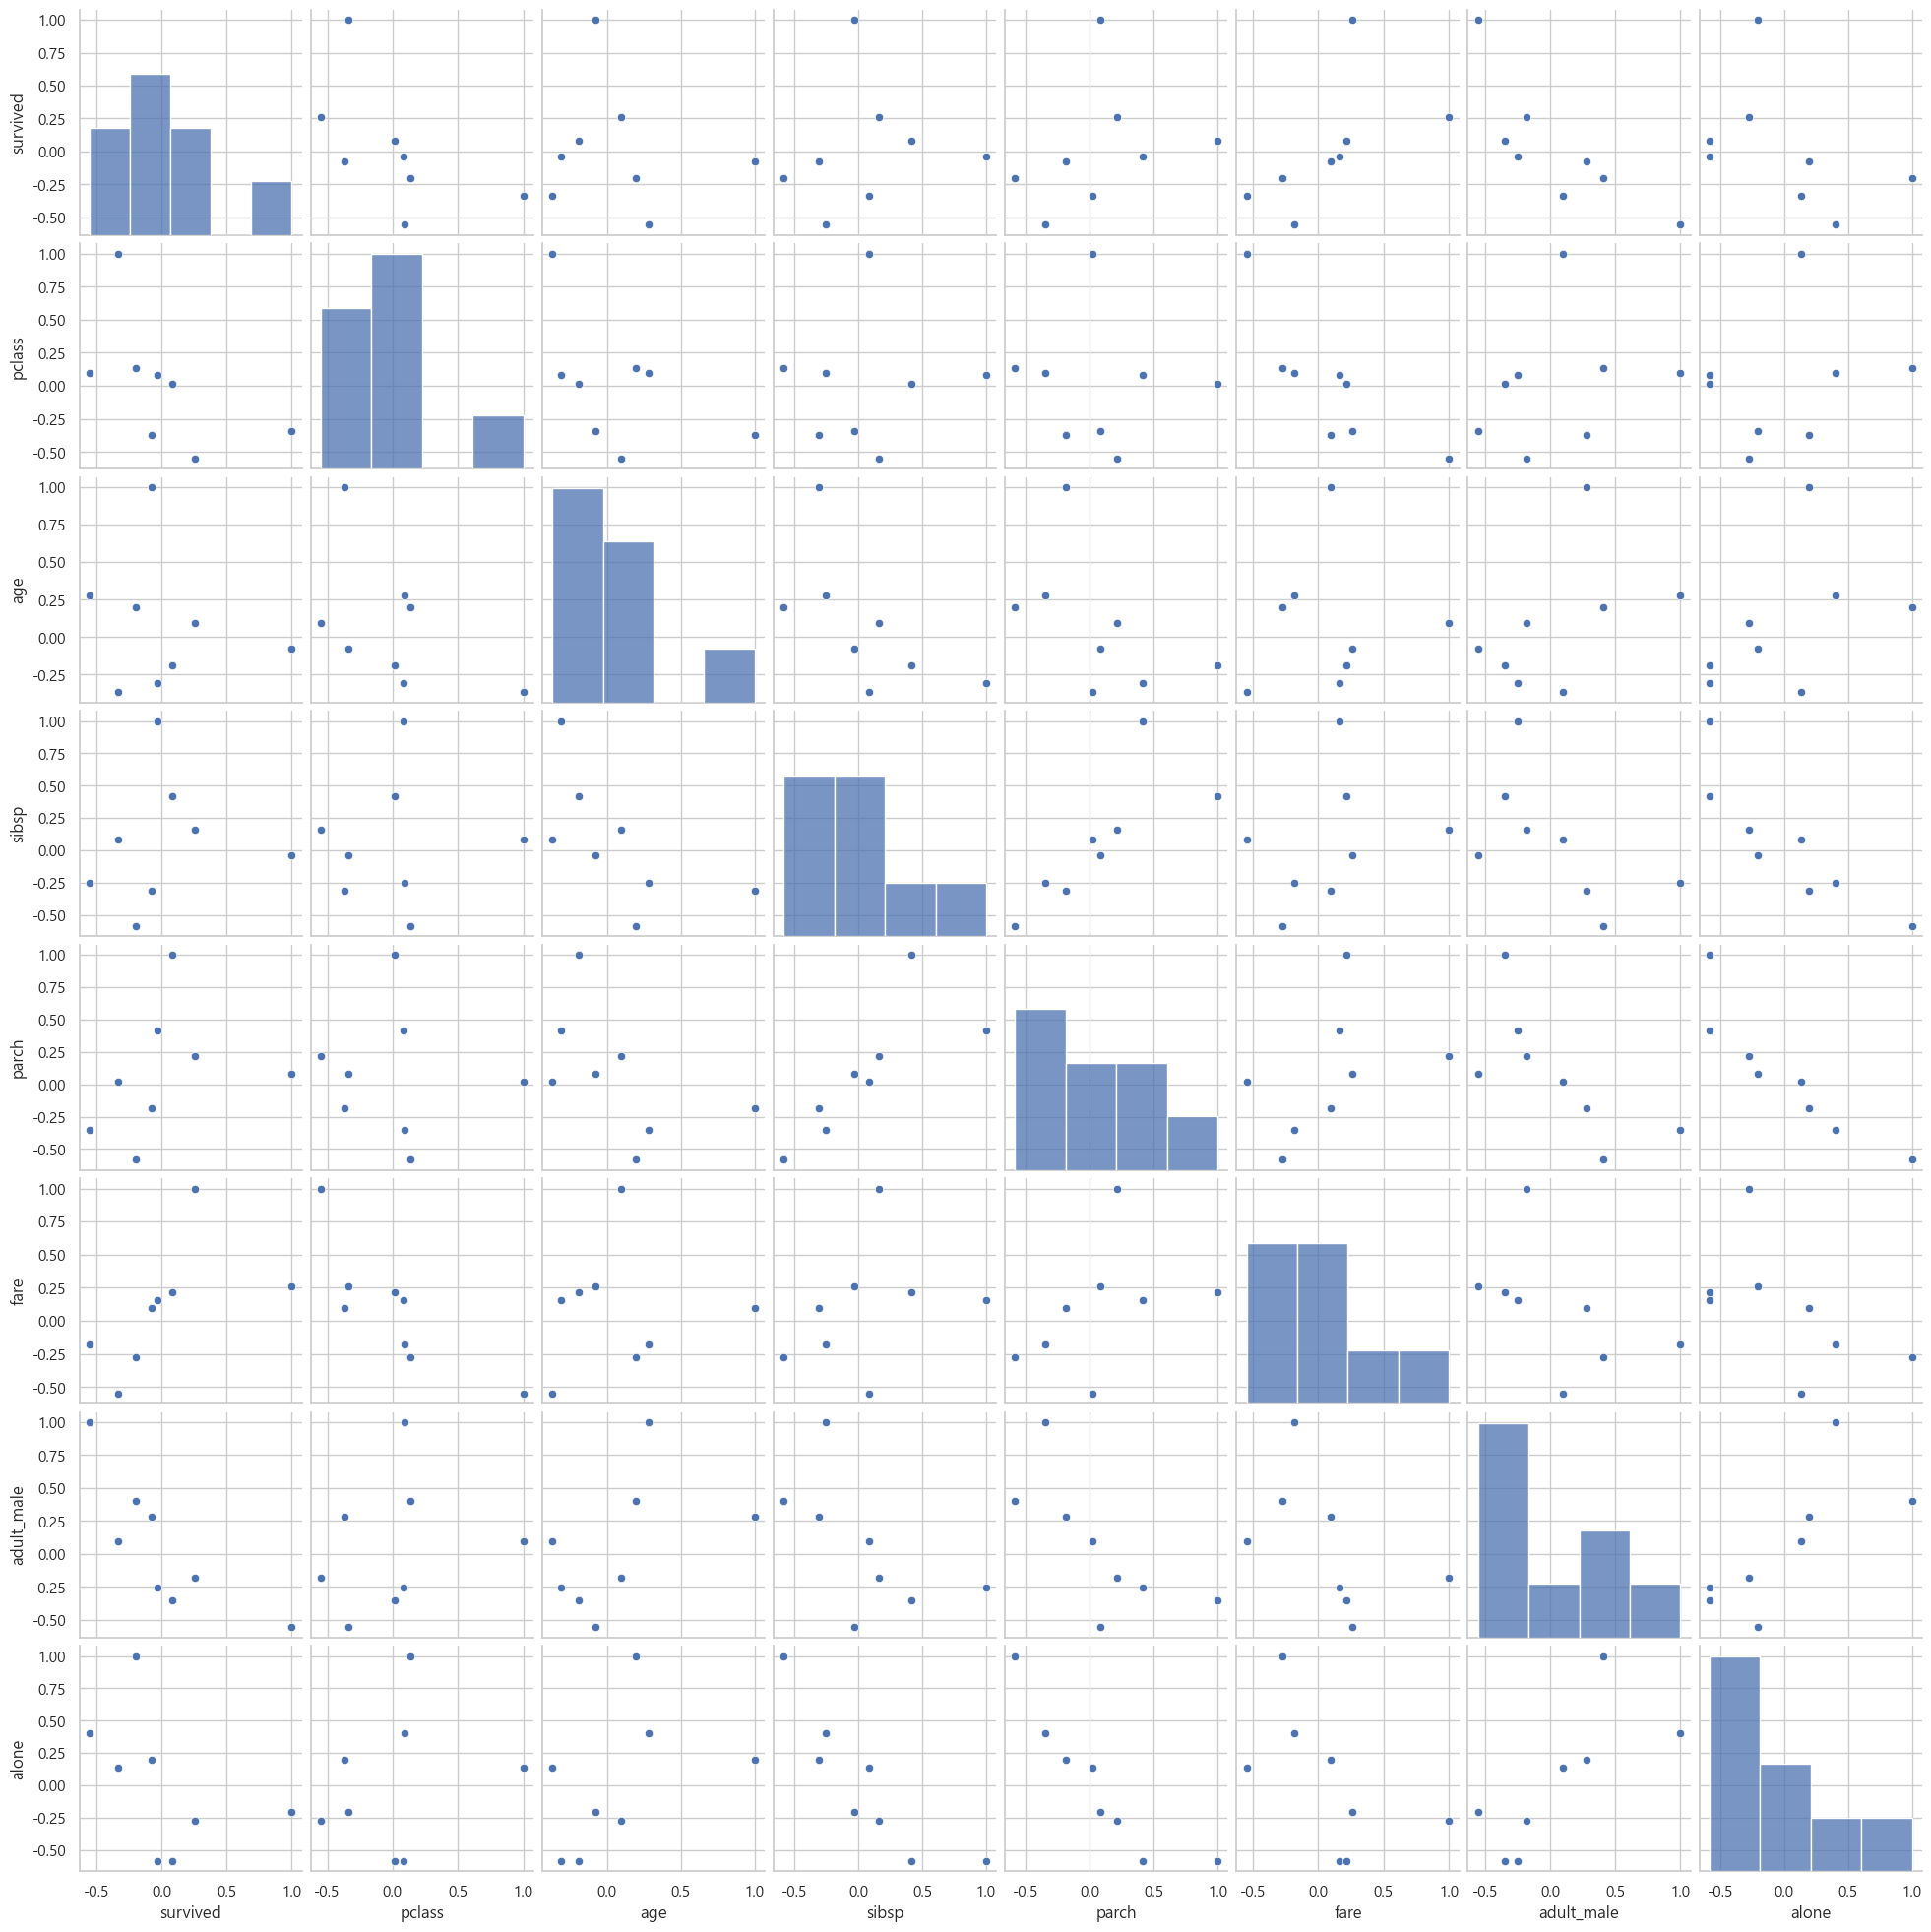

In [83]:
sns.pairplot(titanic_corr)

<Axes: xlabel='survived', ylabel='count'>

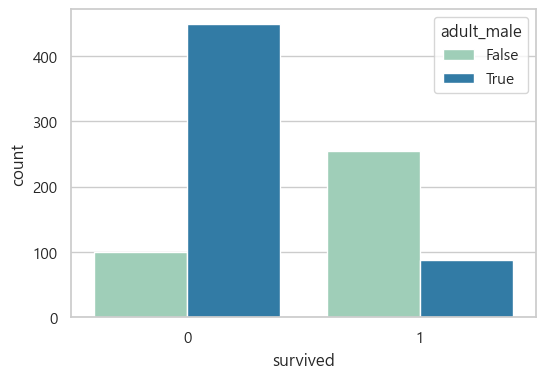

In [84]:
sns.countplot(x='survived', data=titanic, hue='adult_male', palette='YlGnBu')

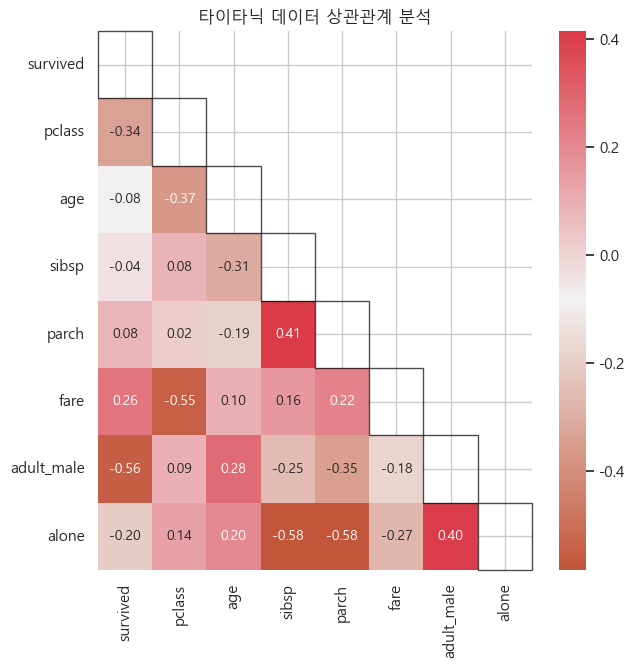

In [85]:
from matplotlib.patches import Rectangle

mask = np.zeros_like(titanic_corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(20, 10, as_cmap=True)
f, ax = plt.subplots(figsize = (7, 7))
titanic_corr_heatmap = sns.heatmap(titanic_corr, annot=True, annot_kws={'size':10}, mask=mask, cmap=cmap, fmt='.2f')
plt.title('타이타닉 데이터 상관관계 분석')
ax.set_xticklabels(list(titanic_corr.columns), rotation=90)
ax.set_yticklabels(list(titanic_corr.columns), rotation=0)

for temp in range(len(titanic_corr.columns)):
    ax.add_patch(Rectangle((temp, temp), 1, 1, fill = False, edgecolor = 'black', lw = 1, clip_on = False, alpha = 0.7))